Epoch: 100; Error: 0.24887306069361625;
Epoch: 200; Error: 0.1393547680128787;
Epoch: 300; Error: 0.13059418359728098;
Epoch: 400; Error: 0.9030149682985045;
Epoch: 500; Error: 0.06044216004278537;
The maximum number of train epochs is reached


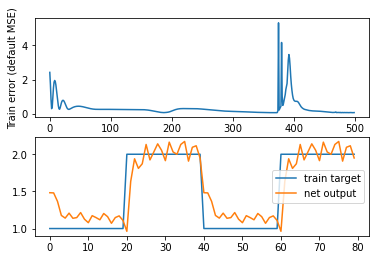

In [4]:
import neurolab as nl
import numpy as np


# Create train samples
i1 = np.sin(np.arange(0, 20))
i2 = np.sin(np.arange(0, 20)) * 2

t1 = np.ones([1, 20])
t2 = np.ones([1, 20]) * 2

input = np.array([i1, i2, i1, i2]).reshape(20 * 4, 1)
target = np.array([t1, t2, t1, t2]).reshape(20 * 4, 1)

# Create network with 2 layers
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Train network
error = net.train(input, target, epochs=500, show=100, goal=0.01)
# Simulate network
output = net.sim(input)

# Plot result
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (default MSE)')

pl.subplot(212)
pl.plot(target.reshape(80))
pl.plot(output.reshape(80))
pl.legend(['train target', 'net output'])
pl.show()

The goal of learning is reached


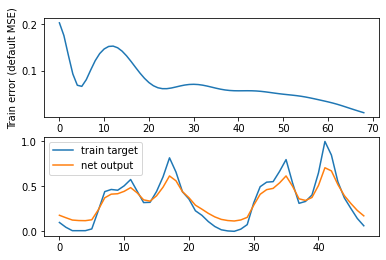

In [54]:
import neurolab as nl
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.preprocessing import MinMaxScaler
#***********************************************************************
serie = pd.read_csv('demanda.csv',  nrows= 48)
demanda=np.asarray([float(x.replace(',','.')) for x in serie['Valor']]).reshape(-1,1)
scaler = MinMaxScaler()
demanda=scaler.fit_transform(demanda)
target = demanda 
#***********************************************************************
# Creamos una red de Elman con dos capas
net = nl.net.newelm([[0, 1]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# Inicializamos los pesos de manera aleatoria
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Entrenamos la red
error = net.train(demanda, target, epochs=500, show=100, goal=0.01)
# Hacemos las predicciones
output = net.sim(demanda)
#***********************************************************************
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (default MSE)')
pl.subplot(212)
pl.plot(target)
pl.plot(output)
pl.legend(['train target', 'net output'])
pl.show()

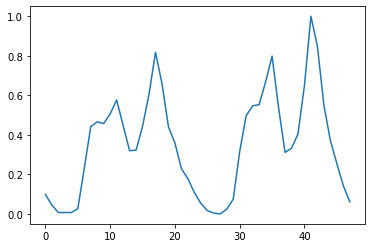

In [57]:
pl.plot(target)